In [22]:
# importing necessary liabraries

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

print("Tensorflow:",tf.__version__)
print("Keras:",keras.__version__)

Tensorflow: 2.17.0
Keras: 3.4.1


In [23]:
batch_size = 32
image_size = 256
channels = 3

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=30,
                             shear_range=0.2,
                             zoom_range=0.2,
                            horizontal_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,)


val_datagen = ImageDataGenerator(rescale= 1./255)

In [25]:
train_dataset = train_datagen.flow_from_directory(directory =  r"C:\Users\bobby\cotton_disease_ classification\data\train",
                                                  target_size = (256,256),
                                                  shuffle= True,
                                                  batch_size = batch_size,
                                                  class_mode = 'sparse')

val_dataset = train_datagen.flow_from_directory(directory = r"C:\Users\bobby\cotton_disease_ classification\data\val",
                                                  target_size = (256,256),
                                                  batch_size = batch_size,
                                                  class_mode = 'sparse')


Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [26]:
class_names = ['diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton plant']

In [27]:
classes = train_dataset.class_indices
print("Training Classes: ", classes)

Training Classes:  {'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}


In [28]:
classes = val_dataset.class_indices
print("Validation Classes: ", classes)

Validation Classes:  {'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}


In [29]:
# Creating a CNN Model
num_of_classes = 4

model = Sequential()

model.add(Conv2D(16,kernel_size= (3,3),padding='valid',activation='relu',input_shape=(image_size,image_size,channels)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size= (3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size= (3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size= (3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size= (3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_of_classes,activation='softmax'))

E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 705,156 (2.69 MB)

 Trainable params: 705,156 (2.69 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [32]:
epochs = 100

history = model.fit(
          train_dataset,
          epochs=epochs,
          batch_size=batch_size,
          verbose=1,
          validation_data = val_dataset
          )

Epoch 1/100


E:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 49s 732ms/step - accuracy: 0.3813 - loss: 1.3607 - val_accuracy: 0.3117 - val_loss: 1.3730
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 694ms/step - accuracy: 0.4088 - loss: 1.3308 - val_accuracy: 0.3117 - val_loss: 1.3844
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 689ms/step - accuracy: 0.4109 - loss: 1.3240 - val_accuracy: 0.3117 - val_loss: 1.3699
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 44s 679ms/step - accuracy: 0.4183 - loss: 1.2991 - val_accuracy: 0.3117 - val_loss: 1.3674
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 682ms/step - accuracy: 0.4163 - loss: 1.2792 - val_accuracy: 0.3117 - val_loss: 1.3040
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 685ms/step - accuracy: 0.4305 - loss: 1.2371 - val_accuracy: 0.3549 - val_loss: 1.2143
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 691ms/step - accuracy: 0.4705 - loss: 1.1756 - val_accuracy: 0.3333 - val_loss: 1.3105
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 43s 656ms/step - accuracy: 0.4860 - loss: 1.1433 - val_accuracy

Epoch 51/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 685ms/step - accuracy: 0.7936 - loss: 0.4984 - val_accuracy: 0.7994 - val_loss: 0.5604
Epoch 52/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 686ms/step - accuracy: 0.8041 - loss: 0.4760 - val_accuracy: 0.6852 - val_loss: 0.7332
Epoch 53/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 44s 680ms/step - accuracy: 0.7696 - loss: 0.5468 - val_accuracy: 0.7623 - val_loss: 0.6106
Epoch 54/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 679ms/step - accuracy: 0.7615 - loss: 0.6048 - val_accuracy: 0.8704 - val_loss: 0.4011
Epoch 55/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 689ms/step - accuracy: 0.8069 - loss: 0.4874 - val_accuracy: 0.7963 - val_loss: 0.4657
Epoch 56/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 679ms/step - accuracy: 0.7973 - loss: 0.4594 - val_accuracy: 0.8148 - val_loss: 0.4521
Epoch 57/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 677ms/step - accuracy: 0.8485 - loss: 0.4220 - val_accuracy: 0.8426 - val_loss: 0.3987
Epoch 58/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 685ms/step - accuracy: 0.8317 - loss: 0

61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 682ms/step - accuracy: 0.8883 - loss: 0.2894 - val_accuracy: 0.9167 - val_loss: 0.2449


In [33]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

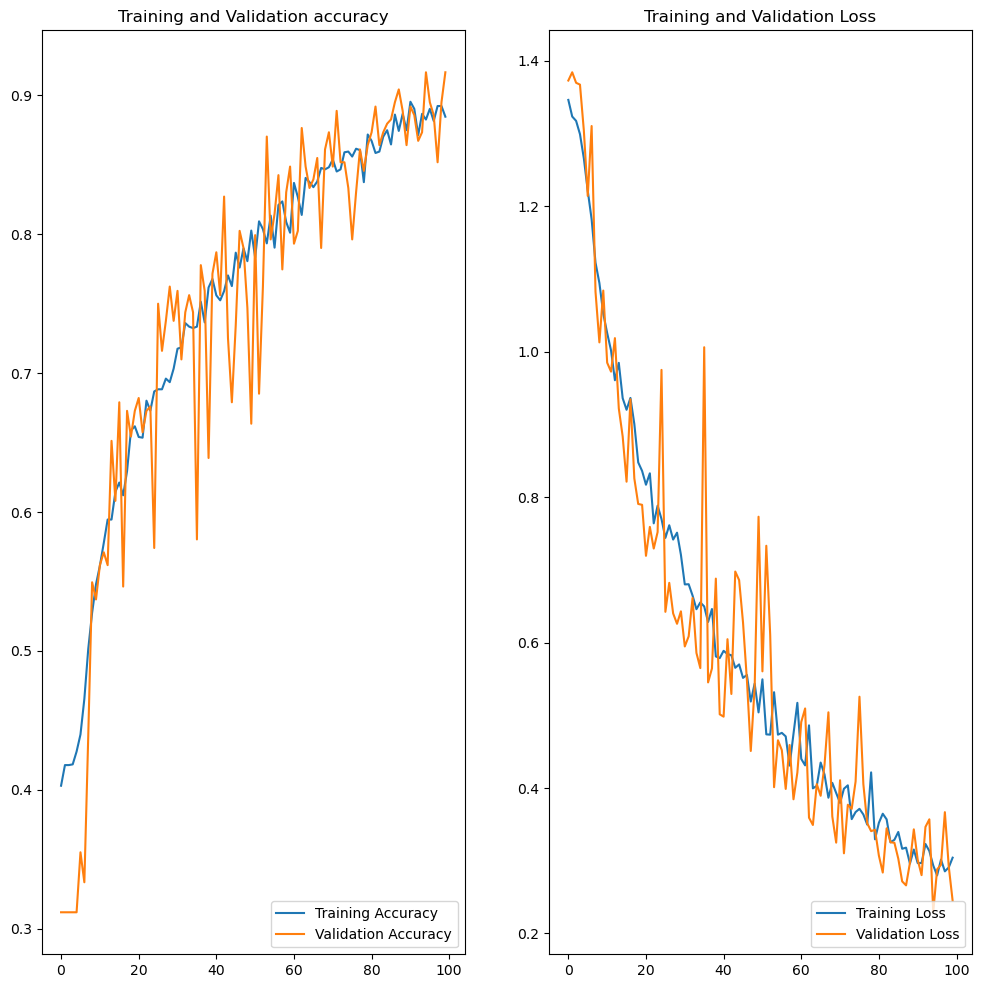

In [34]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label="Training Accuracy")
plt.plot(range(epochs), val_acc, label="Validation Accuracy")
plt.legend(loc ="lower right")
plt.title("Training and Validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label="Training Loss")
plt.plot(range(epochs), val_loss, label="Validation Loss")
plt.legend(loc ="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [35]:
scores = model.evaluate(test_dataset)
print(scores)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.7222 - loss: 47.2680
[47.26799011230469, 0.7222222089767456]


In [52]:
test_dataset = ImageDataGenerator(rescale= 1./255)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory= r"C:\Users\bobby\cotton_disease_ classification\data\val",
    image_size= (image_size,image_size),
    batch_size= batch_size  )

Found 324 files belonging to 4 classes.


In [53]:
def predict(model, image):
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    predictions = model.predict(image)
    confidence = np.max(predictions)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

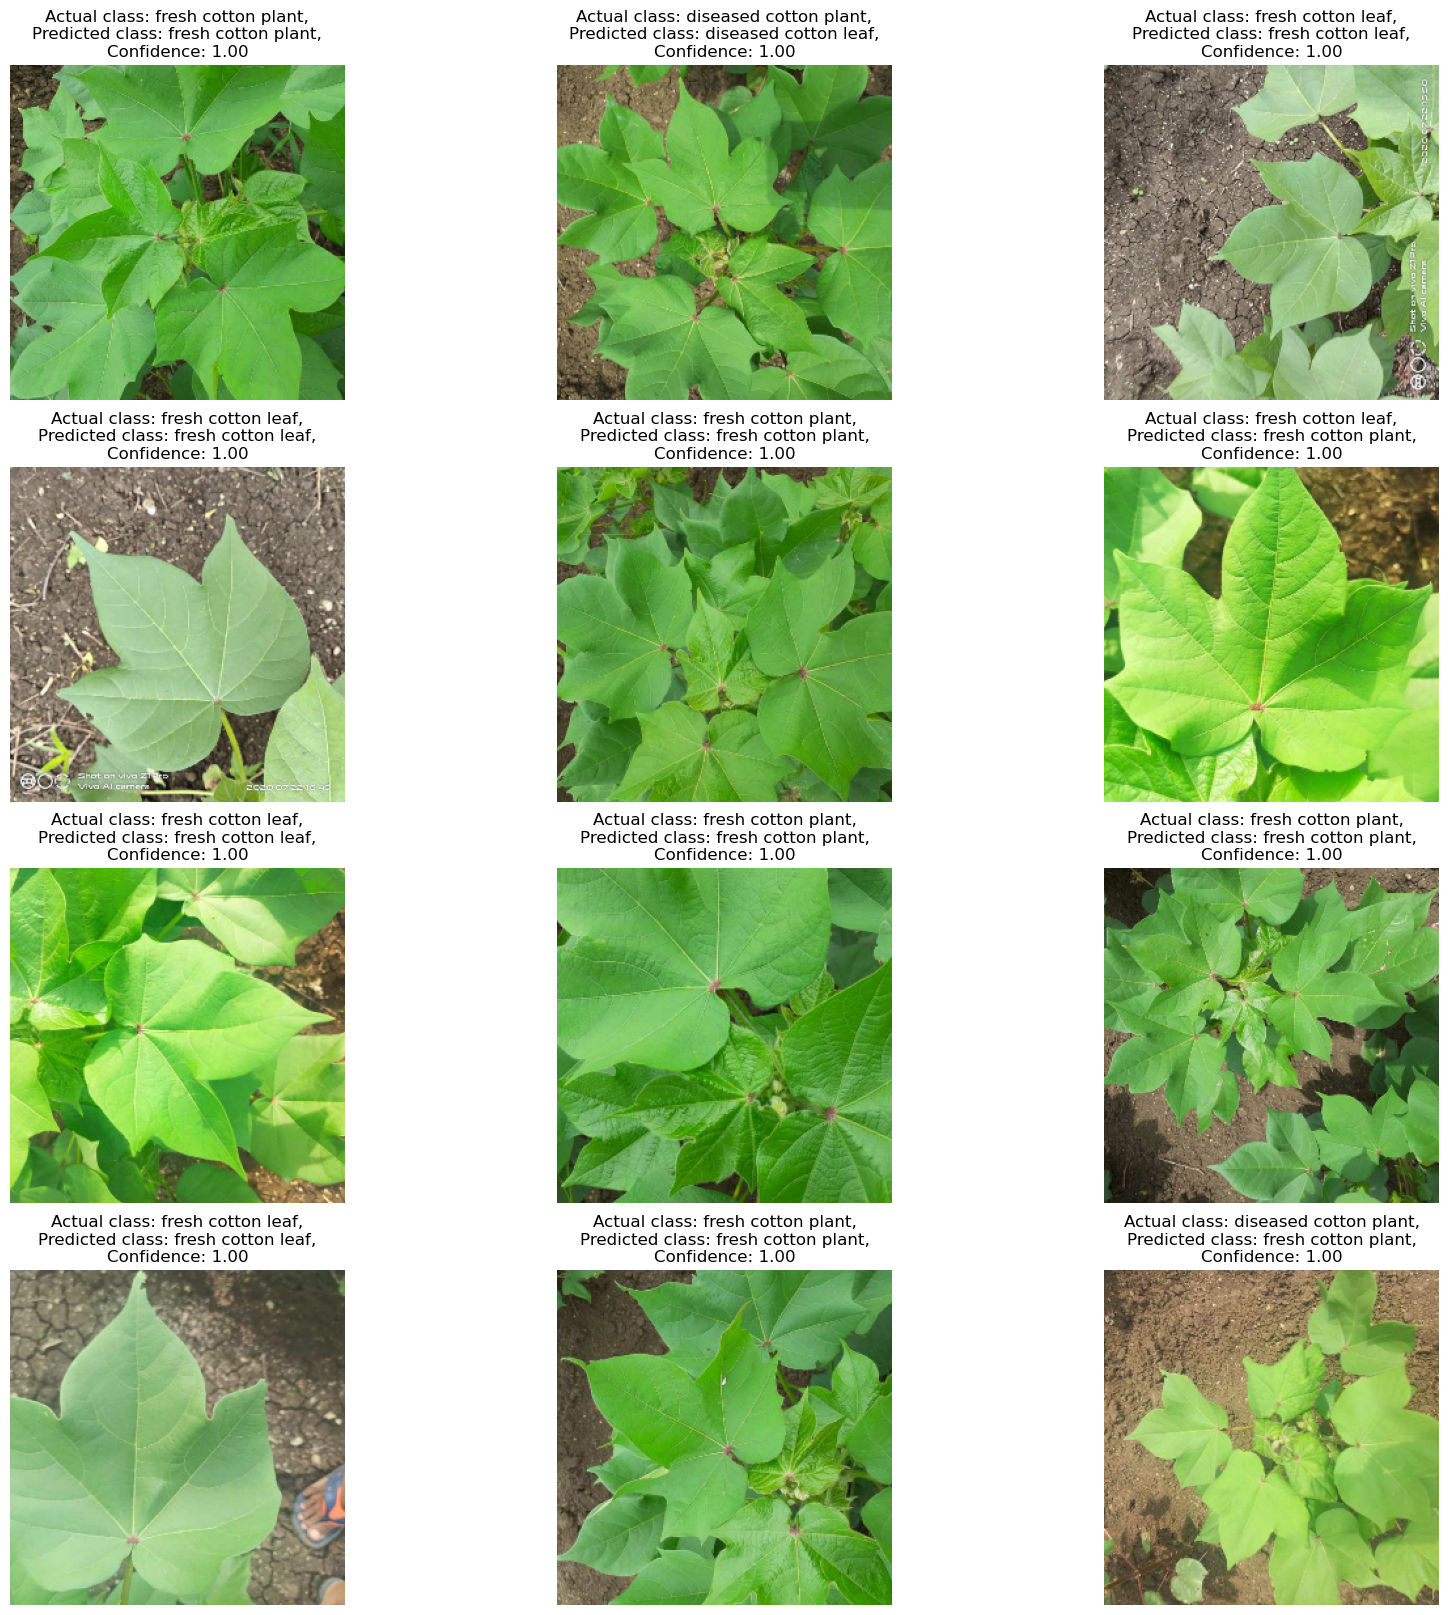

In [60]:
plt.figure(figsize=(20, 20))
for images, labels in test_dataset.take(3):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)  # Correct way to add a subplot
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i].numpy()]  # Correctly accessing the class name
        
        plt.title(f"Actual class: {actual_class},\nPredicted class: {predicted_class},\nConfidence: {confidence:.2f}")
        plt.axis("off")  # Correct way to turn off the axis

plt.show() 
    
    
    
    

In [70]:
model_name = "Cotton_model_1.keras"
model_path = f"C://Users//bobby//cotton_disease_ classification//models//{model_name}" 

# Ensure the directory exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the model in .h5 format
model.save(model_path)
print("your model has been saved")

your model has been saved
